In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


rb_pd = pd.read_csv("ratebeer_wabv.csv", index_col=0)
rb_pd.head()

,reviewid,beer_name,beerid,brewerid,abv,style,appearance,aroma,palate,taste,overall,time,profilename,text,lang
95124,1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.6,0.6,0.65,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en
190266,2,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.8,0.7,0.65,2006-09-03,TomDecapolis,On tap at the John Harvards in Springfield PA....,en
2051884,3,John Harvards Cristal Pilsner,71716,8481,4.8,Bohemian Pilsener,0.8,0.5,0.6,0.6,0.70,2000-05-19,PhillyBeer2112,"UPDATED FEB 19, 2003 Springfield, PA. I ve nev...",en
380484,4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,TomDecapolis,On tap the Springfield PA location billed as t...,en
475621,5,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en


In [2]:
rb_pd.count()

reviewid       2899949
beer_name      2899949
beerid         2899949
brewerid       2899949
abv            2899949
style          2899949
appearance     2899949
aroma          2899949
palate         2899949
taste          2899949
overall        2899949
time           2899949
profilename    2899949
text           2895045
lang           2894838
dtype: int64

In [3]:
rb_pd.isnull().sum()

reviewid          0
beer_name         0
beerid            0
brewerid          0
abv               0
style             0
appearance        0
aroma             0
palate            0
taste             0
overall           0
time              0
profilename       0
text           4904
lang           5111
dtype: int64

In [4]:
rb_pd.shape

(2899949, 15)

In [5]:
rb_pd.columns

Index(['reviewid', 'beer_name', 'beerid', 'brewerid', 'abv', 'style',
       'appearance', 'aroma', 'palate', 'taste', 'overall', 'time',
       'profilename', 'text', 'lang'],
      dtype='object')

In [6]:
rb_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899949 entries, 95124 to 95123
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   reviewid     int64  
 1   beer_name    object 
 2   beerid       int64  
 3   brewerid     int64  
 4   abv          float64
 5   style        object 
 6   appearance   float64
 7   aroma        float64
 8   palate       float64
 9   taste        float64
 10  overall      float64
 11  time         object 
 12  profilename  object 
 13  text         object 
 14  lang         object 
dtypes: float64(6), int64(3), object(6)
memory usage: 354.0+ MB


In [7]:

print('Number of unique brewery by ids:',rb_pd.brewerid.nunique())

Number of unique brewery by ids: 7443


In [8]:

print('Number of unique beer by name:', rb_pd.beer_name.nunique())
print('Number of unique beer by ids:', rb_pd.beerid.nunique())

Number of unique beer by name: 109213
Number of unique beer by ids: 109271


In [9]:
# Ilu jest użytkowników?
print('Number of unique users: ',rb_pd.profilename.nunique())

Number of unique users:  29174


In [10]:
# w jakim języku są recenzje?
lang_count = rb_pd.groupby('lang').size().sort_values(ascending=False).reset_index()
lang_count = lang_count.rename(columns={0: 'count'})
lang_count

,lang,count
0,en,2855211
1,fr,16257
2,de,6979
3,it,4490
4,da,2342
5,no,1654
6,sv,1476
7,hu,1326
8,es,1272
9,nl,907


<AxesSubplot:xlabel='lang', ylabel='count'>

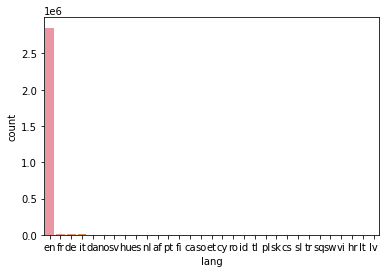

In [11]:
sns.barplot(x="lang", y="count", data=lang_count)


In [12]:
rb_pd.groupby("style").size()

style
Abbey Dubbel               29677
Abbey Tripel               51928
Abt/Quadrupel              19893
Altbier                    16046
Amber Ale                  69427
                           ...  
Traditional Ale            15746
Vienna                     26061
Weizen Bock                15064
Wheat Ale                  43239
Zwickel/Keller/Landbier    16032
Length: 89, dtype: int64

In [2]:
# dodajemy oceny cząstkowe żeby zrobić jedną ogólną ocenę od 0 do 5
rb_pd["total_score"] = rb_pd["appearance"] + rb_pd["aroma"] + rb_pd["palate"] + rb_pd["taste"] + rb_pd["overall"]

In [14]:
rb_pd



,reviewid,beer_name,beerid,brewerid,abv,style,appearance,aroma,palate,taste,overall,time,profilename,text,lang,total_score
95124,1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.6,0.6,0.65,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en,3.25
190266,2,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.8,0.7,0.65,2006-09-03,TomDecapolis,On tap at the John Harvards in Springfield PA....,en,3.55
2051884,3,John Harvards Cristal Pilsner,71716,8481,4.8,Bohemian Pilsener,0.8,0.5,0.6,0.6,0.70,2000-05-19,PhillyBeer2112,"UPDATED FEB 19, 2003 Springfield, PA. I ve nev...",en,3.20
380484,4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,TomDecapolis,On tap the Springfield PA location billed as t...,en,2.00
475621,5,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616906,2899996,Grans UTE pils,101129,2493,4.7,Pale Lager,0.4,0.3,0.4,0.2,0.30,2009-04-29,Finn,"Can 0,5l. Pale golden colored. A small creamy ...",en,1.60
1711993,2899997,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.5,0.4,0.5,0.50,2009-04-23,KnutAlbert,Can from REMA 1000. Better than expected. Firm...,en,2.50
1807118,2899998,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.5,0.4,0.4,0.45,2009-04-18,larsga,Biggish white head. Light yellow body with lig...,en,2.35
1902292,2899999,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.3,0.6,0.4,0.35,2009-04-14,yngwie,"Can. A clear, slightly pale golden beer with a...",en,2.25


In [15]:
# podstawowe statystyki
round(rb_pd.describe())

,reviewid,beerid,brewerid,abv,appearance,aroma,palate,taste,overall,total_score
count,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0,2899949.0
mean,1450006.0,43146.0,2100.0,7.0,1.0,1.0,1.0,1.0,1.0,3.0
std,837154.0,43757.0,3059.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
min,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,725008.0,5011.0,167.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0
50%,1450010.0,26777.0,678.0,6.0,1.0,1.0,1.0,1.0,1.0,3.0
75%,2175002.0,74651.0,2651.0,8.0,1.0,1.0,1.0,1.0,1.0,4.0
max,2900000.0,163404.0,13946.0,58.0,1.0,1.0,1.0,1.0,1.0,5.0


In [16]:
# zamieniamy tym danych time na datetime
rb_pd['time'] = pd.to_datetime(rb_pd['time'], format="%Y-%m-%d")
rb_pd.dtypes

reviewid                int64
beer_name              object
beerid                  int64
brewerid                int64
abv                   float64
style                  object
appearance            float64
aroma                 float64
palate                float64
taste                 float64
overall               float64
time           datetime64[ns]
profilename            object
text                   object
lang                   object
total_score           float64
dtype: object

In [17]:
# z jakiego okresu są recenzje?
print("From: ", rb_pd.time.agg('min'))
print("To: ", rb_pd.time.agg('max'))
print("Total span: ", rb_pd.time.agg('max') - rb_pd.time.agg('min'))

From:  2000-04-12 00:00:00
To:  2012-01-13 00:00:00
Total span:  4293 days 00:00:00


array([[<AxesSubplot:title={'center':'reviewid'}>,
        <AxesSubplot:title={'center':'beerid'}>,
        <AxesSubplot:title={'center':'brewerid'}>],
       [<AxesSubplot:title={'center':'abv'}>,
        <AxesSubplot:title={'center':'appearance'}>,
        <AxesSubplot:title={'center':'aroma'}>],
       [<AxesSubplot:title={'center':'palate'}>,
        <AxesSubplot:title={'center':'taste'}>,
        <AxesSubplot:title={'center':'overall'}>],
       [<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'total_score'}>, <AxesSubplot:>]],
      dtype=object)

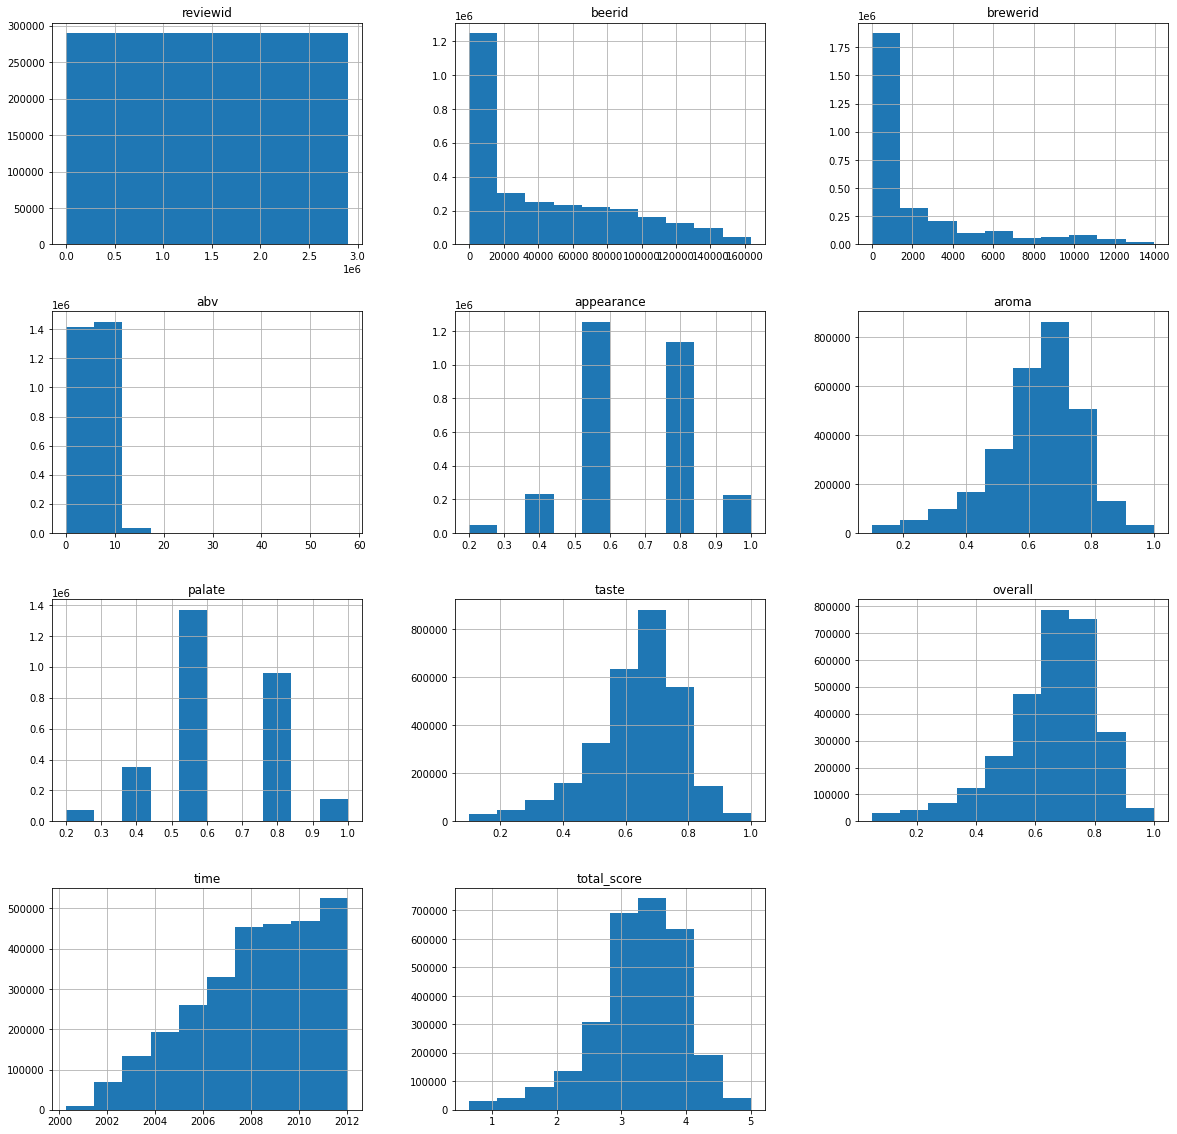

In [18]:
# histograms
rb_pd.hist(figsize = (20,20))

In [19]:
# Dziesięć najpopularniejszych producentów
popular_brewery = rb_pd.groupby('brewerid').brewerid.count()
popular_brewery = popular_brewery.sort_values(ascending= False)
Top_10_popular_breweries = pd.DataFrame(popular_brewery.iloc[0:10])
Top_10_popular_breweries.columns = ['Najpopularniejsi producenci']
Top_10_popular_breweries

,Najpopularniejsi producenci
brewerid,
32,46566
76,38663
198,37364
96,35151
232,32433
84,32418
67,31823
15,25159
75,24573


In [20]:
# Dziesięciu producentów z najwyższą liczbą piw
top_10_breweries_by_beertype = rb_pd.groupby(['brewerid']).beer_name.nunique().sort_values(ascending = False)
top_10_breweries_by_beertype = top_10_breweries_by_beertype.iloc[0:10]
top_10_breweries_by_beertype = pd.DataFrame(top_10_breweries_by_beertype)
top_10_breweries_by_beertype.columns = ['Producenci z najwyższą liczbą piw']
top_10_breweries_by_beertype

,Producenci z najwyższą liczbą piw
brewerid,
128,342
1424,327
2594,313
2028,311
9990,284
249,224
233,220
234,212
678,209


In [21]:
# Dziesięć piw z największą liczbą recenzji
top_10_popular_beers = pd.DataFrame(rb_pd.groupby('beer_name').beer_name.count().sort_values(ascending = False).
                                    iloc[0:10])
top_10_popular_beers.columns = ['Najpopularniejsze piwa']
top_10_popular_beers

,Najpopularniejsze piwa
beer_name,
Guinness Draught,3696
Pabst Blue Ribbon,3662
Dogfish Head 90 Minute Imperial IPA,3230
Budweiser,3126
Sierra Nevada Pale Ale (Bottle),3119
Samuel Adams Boston Lager,3110
Chimay Bleue (Blue) / Grande Rserve,3056
North Coast Old Rasputin Russian Imperial Stout,2904
Stone Arrogant Bastard Ale,2872


In [22]:
# Dziesięć najlepiej ocenianych piw które mają ponad sto recenzji
beers_grouped = pd.DataFrame(rb_pd.groupby(['beer_name']).agg({"total_score":["mean"]}))
beers_grouped = beers_grouped.reset_index()
Top_beer_ratings100 = rb_pd.groupby(["beer_name"])
Top_beer_ratings100 = Top_beer_ratings100.size().to_frame(name="review_count") 
Top_beer_ratings100 = Top_beer_ratings100[Top_beer_ratings100["review_count"] > 100]
Top_beer_ratings100 = Top_beer_ratings100.reset_index()
Top_beer_ratings = pd.merge(Top_beer_ratings100, beers_grouped, how="left", on=["beer_name"])
Top_beer_ratings = Top_beer_ratings.rename(columns={('total_score', 'mean'):"total_score"})
Top_beer_ratings = Top_beer_ratings.sort_values(by="total_score", ascending = False)
Top_beer_ratings.iloc[0:10]

/tmp/ipykernel_10305/2884893063.py:8: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  Top_beer_ratings = pd.merge(Top_beer_ratings100, beers_grouped, how="left", on=["beer_name"])
/home/ubuntu/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,beer_name,review_count,total_score
4949,Westvleteren 12,2060,4.481845
4631,Three Floyds Oak Aged Dark Lord Russian Imperi...,262,4.460687
471,Bells Bourbon Barrel Double Cream/Expedition S...,208,4.375481
1729,Goose Island Rare Bourbon County Stout,223,4.375112
1026,Cigar City Zhukovs Final Push,122,4.358607
4616,Three Floyds Dark Lord Russian Imperial Stout,1319,4.353071
127,AleSmith Speedway Stout,1606,4.343369
113,AleSmith Barrel Aged Speedway Stout,483,4.337474
4636,Three Floyds Vanilla Bean Barrel Aged Dark Lor...,184,4.326630
477,Bells Expedition Stout,2155,4.314037


/home/ubuntu/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


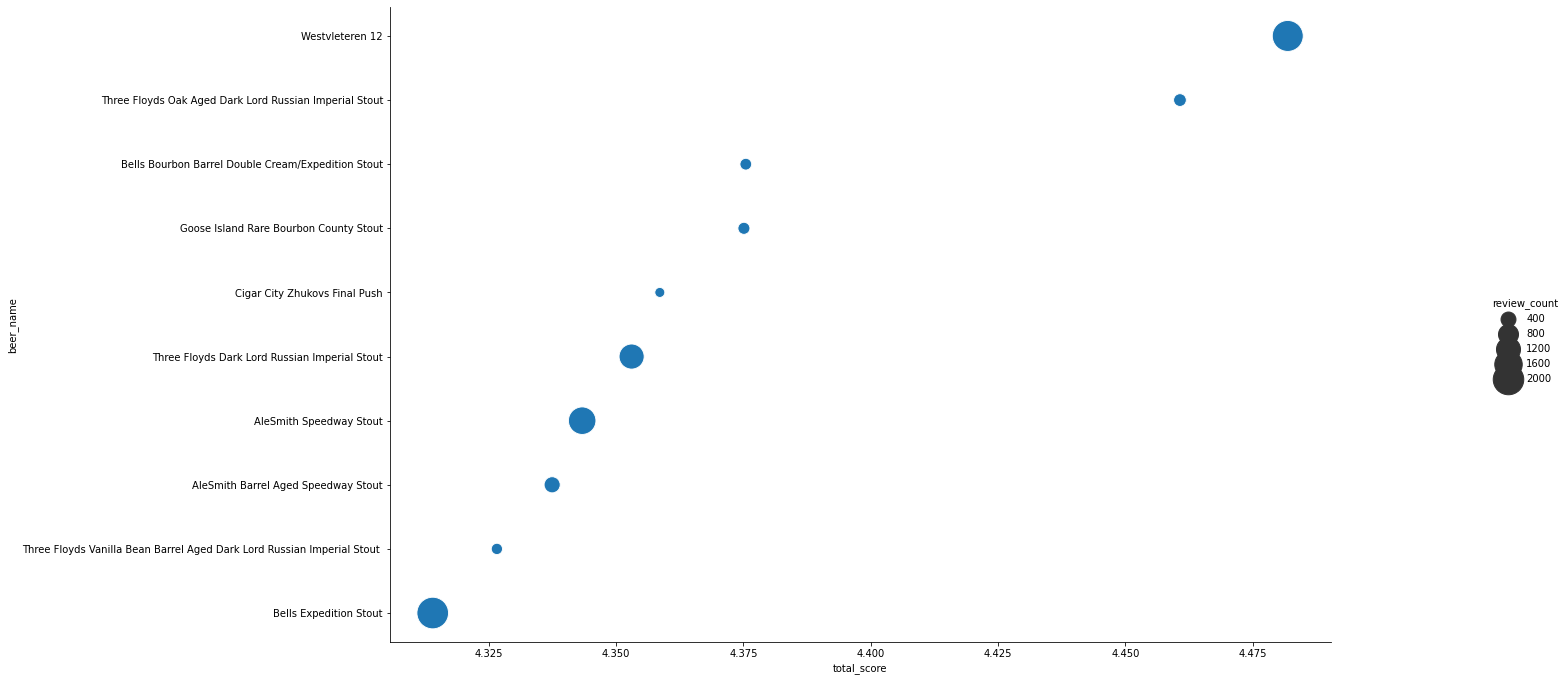

In [23]:
sns.relplot(x="total_score", y="beer_name", size="review_count", sizes=(100, 1000), data=Top_beer_ratings.iloc[0:10])
plt.gcf().set_size_inches(18, 10)

In [24]:
# Dziesięć najlepiej ocenianych piw które mają ponad sto recenzji - inny sposób
top_beers = rb_pd[['total_score','beer_name','beerid', 'brewerid']].groupby('beer_name').agg(['count','mean'])
top_beers = pd.DataFrame(top_beers[(top_beers['total_score','count']>200)])
top_beers = top_beers.sort_values(by = ([('total_score','mean')]),ascending = False)
top_beers = top_beers.drop(columns={('beerid', 'count'),('brewerid', 'count')})
top_beers.iloc[0:10]

total_score            \
                                                         count      mean   
beer_name                                                                  
Westvleteren 12                                           2060  4.481845   
Three Floyds Oak Aged Dark Lord Russian Imperia...         262  4.460687   
Bells Bourbon Barrel Double Cream/Expedition Stout         208  4.375481   
Goose Island Rare Bourbon County Stout                     223  4.375112   
Three Floyds Dark Lord Russian Imperial Stout             1319  4.353071   
AleSmith Speedway Stout                                   1606  4.343369   
AleSmith Barrel Aged Speedway Stout                        483  4.337474   
Bells Expedition Stout                                    2155  4.314037   
Cigar City Hunahpus Imperial Stout                         438  4.312329   
Founders CBS (Canadian Breakfast Stout)                    386  4.306736   

                                                      beerid brewerid  
                                                        mean     mean  
beer_name                                                              
Westvleteren 12                                       4934.0    623.0  
Three Floyds Oak Aged Dark Lord Russian Imperia...   58590.0    231.0  
Bells Bourbon Barrel Double Cream/Expedition Stout   71826.0    232.0  
Goose Island Rare Bourbon County Stout              116684.0  12853.0  
Three Floyds Dark Lord Russian Imperial Stout        15917.0    231.0  
AleSmith Speedway Stout                              14232.0    432.0  
AleSmith Barrel Aged Speedway Stout                  28173.0    432.0  
Bells Expedition Stout                                3214.0    232.0  
Cigar City Hunahpus Imperial Stout                   97078.0   9990.0  
Founders CBS (Canadian Breakfast Stout)              98973.0    554.0

In [25]:
# 10 piw z najsłabszą oceną i ilością recenzji większą niż 100

lowest_beer_ratings = Top_beer_ratings.sort_values(by="total_score", ascending = True)
lowest_beer_ratings.iloc[0:10]

,beer_name,review_count,total_score
814,Busch NA,143,1.088112
3172,ODouls,411,1.122871
4123,Sleeman Clear,127,1.176772
812,Busch Ice,136,1.181618
2830,Michelob Ultra,1064,1.186513
801,Budweiser Select 55,148,1.207095
1082,Coors Non-Alcoholic,118,1.232627
2966,Natural Ice,750,1.238267
2897,Milwaukees Best,791,1.242604
2786,Meister Brau,122,1.246311


In [26]:
# Top 10 popular Beer styles
popular_beer_styles = pd.DataFrame(rb_pd.groupby('style').style.count().sort_values(ascending = False).iloc[0:10])
popular_beer_styles.columns = ['Liczba recenzji']
popular_beer_styles

,Liczba recenzji
style,
India Pale Ale (IPA),184488
Pale Lager,141563
Belgian Strong Ale,123668
Imperial Stout,122025
Imperial/Double IPA,105461
American Pale Ale,101397
Porter,93926
Barley Wine,90084
Fruit Beer,78850


In [27]:
# Top 10 styli z najwyższą średnią oceną
Top_rating_beer_styles = rb_pd[['style','total_score', 'abv']].groupby('style').agg('mean').\
                        sort_values('total_score', ascending = False).iloc[0:10]
Top_rating_beer_styles = pd.DataFrame(Top_rating_beer_styles)
Top_rating_beer_styles

,total_score,abv
style,,
Imperial Stout,3.919482,10.001260
Ice Cider/Perry,3.834828,9.911427
Abt/Quadrupel,3.827311,10.402373
Imperial/Strong Porter,3.794373,8.562406
Imperial/Double IPA,3.771687,9.038628
Sak - Koshu,3.765517,15.348276
Sour Ale/Wild Ale,3.741595,7.298949
Lambic - Gueuze,3.690131,6.202202
Barley Wine,3.688356,10.656929


In [28]:
# 10 styli z najmniejszą średnią oceną
lowest_rating_beer_styles = rb_pd[['style','total_score', 'abv']].groupby('style').agg('mean').\
                        sort_values('total_score', ascending = True).iloc[0:10]
lowest_rating_beer_styles = pd.DataFrame(lowest_rating_beer_styles)
lowest_rating_beer_styles

,total_score,abv
style,,
Malt Liquor,1.848355,7.070527
Low Alcohol,1.883696,1.162983
Pale Lager,2.017317,4.604137
Sak - Futsu-shu,2.422420,14.640925
Premium Lager,2.683135,4.957964
American Dark Lager,2.710682,4.911596
Perry,2.778391,5.853004
Sak - Infused,2.814220,11.901376
Cream Ale,2.846462,5.121499


In [29]:
# piwa z najlepszą oceną appreance, aroma i taste
beers_looks_smell = rb_pd[['beer_name', 'aroma','appearance','taste']]
beers_looks_smell = beers_looks_smell.groupby('beer_name').aggregate(['mean'])
beers_looks_smell = beers_looks_smell.sort_values(by = [('aroma', 'mean'),('appearance', 'mean'),('taste', 'mean')],
                                                  ascending = False)
beers_looks_smell.iloc[0:15]

,aroma,appearance,taste
,mean,mean,mean
beer_name,,,
Austin Beerworks Sputnik Russion Imperial Oatmeal Stout,1.0,1.0,1.0
Beaver Creek Paddlefish Stout,1.0,1.0,1.0
Beaver Creek Wibaux Gold,1.0,1.0,1.0
Blackfoot River Woollybugger Wheat,1.0,1.0,1.0
Bonnema Mudhole Porter,1.0,1.0,1.0
Bulldog TKO IPA,1.0,1.0,1.0
Columbia River Hollywood Hefe,1.0,1.0,1.0
George Vreeland Hills Boston Lager,1.0,1.0,1.0


In [30]:
# piwa z najlepszą oceną overall i taste
top_ratings_taste = rb_pd[['brewerid','beer_name','overall','taste']]
top_ratings_taste = top_ratings_taste.groupby(['brewerid','beer_name']).aggregate(['mean'])
top_ratings_taste = top_ratings_taste.sort_values(by = [('overall', 'mean'),('taste', 'mean')],
                                                  ascending = False)
top_ratings_taste.iloc[0:15]

,,overall,taste
,,mean,mean
brewerid,beer_name,,
131,Abbaye des Rocs Transfrontaliere,1.0,1.0
248,Harveys Trafalgar (Cask),1.0,1.0
257,George Vreeland Hills Boston Lager,1.0,1.0
279,Moylans Hefe Doppel Weizen,1.0,1.0
321,Bonnema Mudhole Porter,1.0,1.0
489,Willimantic Mail Sack Stout,1.0,1.0
620,Church Brew Roasters Rebellion,1.0,1.0
821,Portsmouth Brewing Company Crystal Gold Lager,1.0,1.0


In [31]:
# Najlepsze browary pod względem średniej oceny z ilością recenzji >100
top_breweries = rb_pd[['total_score','brewerid']].groupby('brewerid').agg(['count','mean'])
top_breweries = pd.DataFrame(top_breweries[(top_breweries['total_score','count']>100)])
top_breweries = top_breweries.sort_values(by = ([('total_score','mean')]),ascending = False).reset_index().iloc[0:10]
top_breweries

brewerid total_score          
                 count      mean
0      623        4422  4.276594
1     4371         614  4.029886
2      432       13537  3.993632
3    11233        2115  3.961584
4     1480       11998  3.942890
5      132        2924  3.911218
6     2058        5579  3.910961
7    10849         246  3.884553
8     5635         380  3.874737
9       94        7442  3.873683

In [32]:
# Piwa z total_score większą niż 4 i liczbą recenzji większą niż 200

reshape = rb_pd[['total_score','beer_name', 'beerid']].groupby('beer_name').agg(['count','mean'])
Top_beers = pd.DataFrame(reshape[(reshape['total_score','mean']>4) & (reshape['total_score','count']>200)])
Top_beers = Top_beers.sort_values(('total_score', 'count'), ascending=False) 
Top_beers

total_score            \
                                                         count      mean   
beer_name                                                                  
Dogfish Head 90 Minute Imperial IPA                       3230  4.056053   
Chimay Bleue (Blue) / Grande Rserve                       3056  4.018292   
North Coast Old Rasputin Russian Imperial Stout           2904  4.116340   
St. Bernardus Abt 12                                      2673  4.152806   
Stone Ruination IPA                                       2670  4.026236   
...                                                        ...       ...   
North Coast Old Stock Cellar Reserve Brandy Barrel         214  4.124299   
Russian River Deviation (Bottleworks IX)                   214  4.171495   
Lost Abbey Sinners 08                                      213  4.044836   
Russian River Beatification (Batch 001)                    209  4.105024   
Bells Bourbon Barrel Double Cream/Expedition Stout         208  4.375481   

                                                   beerid           
                                                    count     mean  
beer_name                                                           
Dogfish Head 90 Minute Imperial IPA                  3230  10569.0  
Chimay Bleue (Blue) / Grande Rserve                  3056     53.0  
North Coast Old Rasputin Russian Imperial Stout      2904    680.0  
St. Bernardus Abt 12                                 2673   2530.0  
Stone Ruination IPA                                  2670  14709.0  
...                                                   ...      ...  
North Coast Old Stock Cellar Reserve Brandy Barrel    214  77372.0  
Russian River Deviation (Bottleworks IX)              214  83697.0  
Lost Abbey Sinners 08                                 213  90688.0  
Russian River Beatification (Batch 001)               209  55427.0  
Bells Bourbon Barrel Double Cream/Expedition Stout    208  71826.0  

[136 rows x 4 columns]

In [33]:
# Jakie piwa produkują najlepsze browary?
top_styles = rb_pd[rb_pd.brewerid.isin(top_breweries.brewerid)].groupby('style').brewerid.count().sort_values(ascending=False).head(10)
top_styles = pd.DataFrame(top_styles).reset_index()
top_styles = top_styles.rename(columns={"brewerid":"count"})

top_styles_bb = rb_pd[rb_pd.brewerid.isin(top_breweries.brewerid)].groupby('style').agg('mean')
top_styles_bb = pd.DataFrame(top_styles_bb).reset_index()
top_styles_bb = top_styles_bb[top_styles_bb['style'].isin(top_styles['style'].values.tolist())]
top_styles_bb = top_styles_bb.drop(columns={'reviewid', 'beerid' , 'brewerid', 'appearance', 'aroma', 'palate',
                                            'taste', 'overall'})
top_styles_bb = top_styles_bb.rename(columns={'abv': 'abv_best', 'total_score': 'total_score_best'})

styles_all = rb_pd[rb_pd['style'].isin(top_styles['style'].values.tolist())].groupby('style').agg('mean').reset_index()
styles_all = styles_all.drop(columns={'reviewid', 'beerid' , 'brewerid', 'appearance', 'aroma', 'palate', 'taste',
                                      'overall'})
styles_all = styles_all.rename(columns={'abv': 'abv_all_data', 'total_score': 'total_score_all_data'})

top_styles_merged = pd.merge(top_styles, top_styles_bb, on='style')
top_styles_merged = pd.merge(top_styles_merged, styles_all, on='style')
top_styles_merged['abv_diff'] = top_styles_merged['abv_best'] - top_styles_merged['abv_all_data'] 
top_styles_merged['score_diff'] = top_styles_merged['total_score_best'] - top_styles_merged['total_score_all_data']
top_styles_merged = top_styles_merged[['style', 'count', 'abv_best', 'abv_all_data', 'abv_diff', 'total_score_best',
                                       'total_score_all_data', 'score_diff']]
top_styles_merged


,style,count,abv_best,abv_all_data,abv_diff,total_score_best,total_score_all_data,score_diff
0,Belgian Ale,5149,5.965333,6.219410,-0.254077,3.839561,3.340613,0.498948
1,Barley Wine,4902,10.965708,10.656929,0.308779,3.976367,3.688356,0.288011
2,Sour Ale/Wild Ale,4661,7.212221,7.298949,-0.086728,4.039777,3.741595,0.298181
3,Belgian Strong Ale,4484,9.146532,9.114270,0.032263,3.906646,3.625564,0.281081
4,Imperial/Double IPA,4050,9.253358,9.038628,0.214730,4.113272,3.771687,0.341584
5,Lambic - Gueuze,2784,6.335057,6.202202,0.132856,4.008082,3.690131,0.317951
6,India Pale Ale (IPA),2627,6.735322,6.582188,0.153134,3.976627,3.513087,0.463540
7,Imperial Stout,2381,10.161655,10.001260,0.160394,4.322932,3.919482,0.403449
8,Abt/Quadrupel,2209,10.207877,10.402373,-0.194496,4.445179,3.827311,0.617868
9,Traditional Ale,1934,7.210910,5.736342,1.474568,4.066701,3.381033,0.685668


<AxesSubplot:xlabel='style', ylabel='count'>

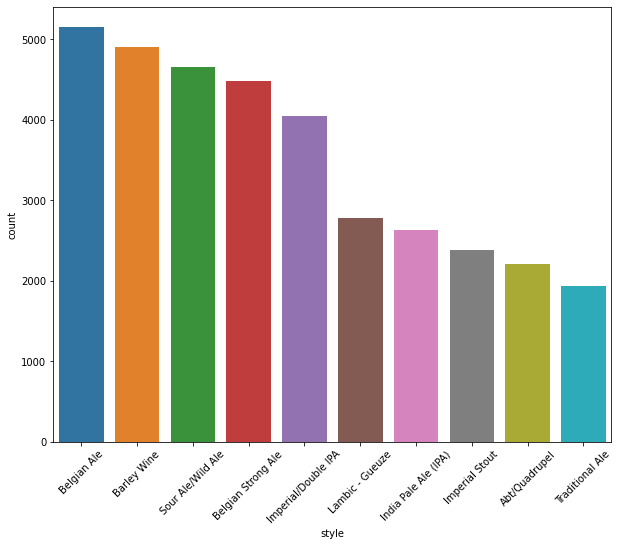

In [34]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(x="style", y="count", data=top_styles)

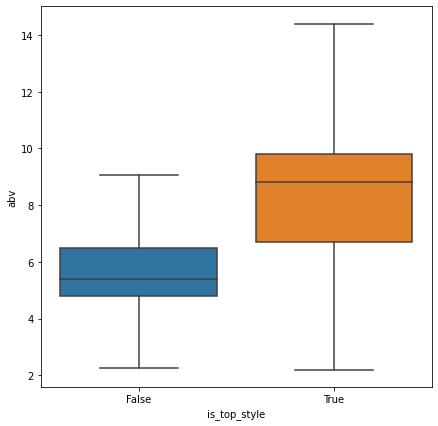

In [35]:
# Jaka jest średnia zawartość alkoholu(ABV) w najwyżej ocenianych stylach najlepszych browarów
# w porównaniu do średniej ABV?

rb_pd['is_top_style'] = rb_pd["style"].isin(top_styles["style"])
sns.boxplot(x='is_top_style', y='abv', data=rb_pd, showfliers=False)
plt.gcf().set_size_inches(7, 7)

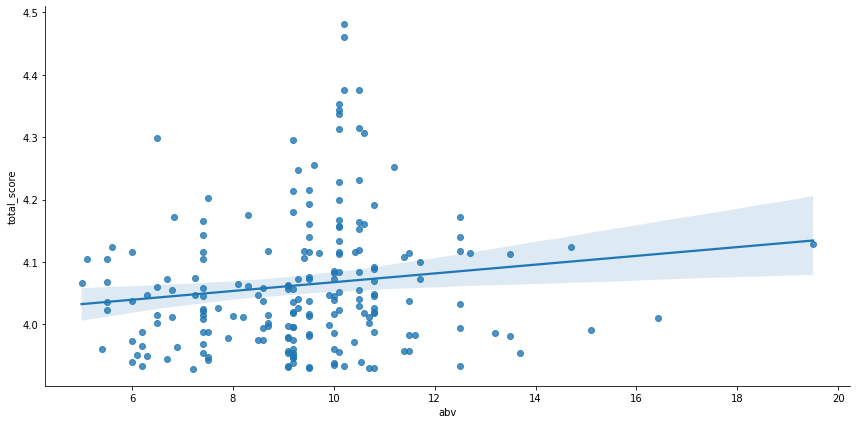

In [36]:
# najlepsze browary produkują piwa o wyższej zawartości alkoholu
# czy ABV wpływa na ocenę?

sns.lmplot(data=rb_pd[rb_pd.beerid.isin(top_beers[("beerid", "mean")].iloc[0:200])].groupby('beer_name')
           .agg({'total_score': 'mean', 'abv': 'mean'}).reset_index(), x="abv", y="total_score", height=6, aspect=2)

In [37]:
# Linia trendu jest lekko wznosząca, ale cały czas blisko poziomu więc nie wskazuje na to że,
# im większe ABV tym wyższa ocena. Sprawdźmy czy oceny cząstkowe są jakoś połączone.

rb_corr = rb_pd[rb_pd.brewerid.isin(top_beers[('brewerid', 'mean')])].drop(columns={"reviewid", "beerid", "brewerid"}).corr()
rb_corr

,abv,appearance,aroma,palate,taste,overall,total_score,is_top_style
abv,1.000000,0.307645,0.444350,0.359248,0.420194,0.436134,0.459082,0.572222
appearance,0.307645,1.000000,0.544133,0.567321,0.552640,0.569659,0.752951,0.211378
aroma,0.444350,0.544133,1.000000,0.603886,0.790919,0.786639,0.869179,0.326370
palate,0.359248,0.567321,0.603886,1.000000,0.698302,0.700614,0.833696,0.256760
taste,0.420194,0.552640,0.790919,0.698302,1.000000,0.875189,0.913437,0.302451
overall,0.436134,0.569659,0.786639,0.700614,0.875189,1.000000,0.917745,0.313405
total_score,0.459082,0.752951,0.869179,0.833696,0.913437,0.917745,1.000000,0.329100
is_top_style,0.572222,0.211378,0.326370,0.256760,0.302451,0.313405,0.329100,1.000000


<AxesSubplot:>

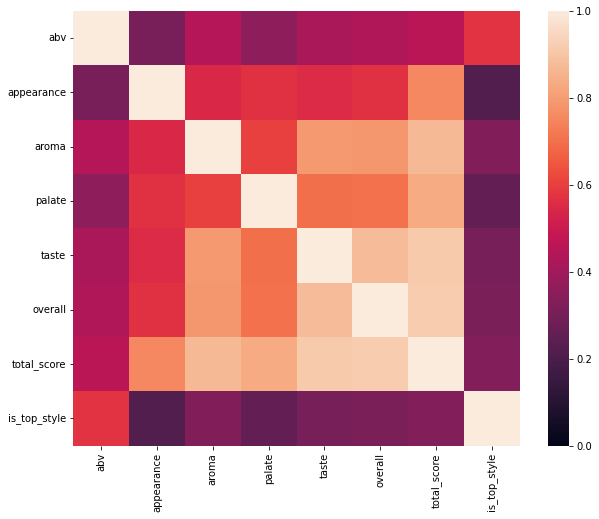

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(rb_corr, vmin=0, vmax=1)

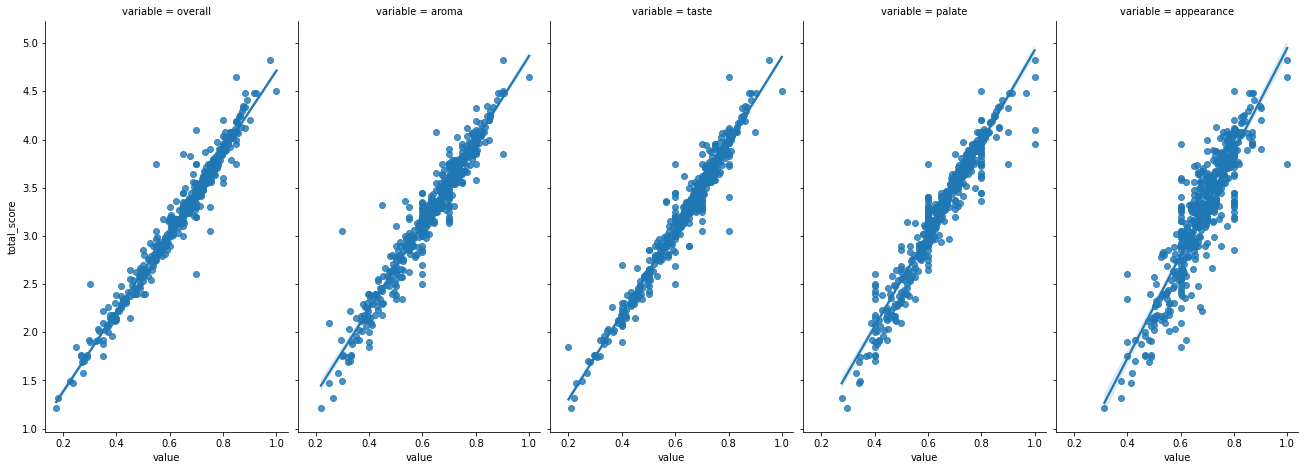

In [39]:
# Z oceną końcową najbardziej połączona jest ocena ogólnego odczucia(overall) i smak (taste)

corr_df = rb_pd[rb_pd.brewerid.isin(top_beers[('brewerid', 'mean')])].groupby('beer_name').agg({
    'overall': 'mean', 
    'aroma': 'mean',
    'taste': 'mean',
    'palate': 'mean',
    'appearance': 'mean',
    'total_score': 'mean'}).reset_index().iloc[0:500]

corr_df = pd.melt(corr_df, id_vars=['total_score', 'beer_name'])
sns.lmplot(data=corr_df, x='value', y='total_score', col='variable')
plt.gcf().set_size_inches(18, 7)

In [40]:
rb_pd.loc[rb_pd['abv']>20].count()


reviewid        316
beer_name       316
beerid          316
brewerid        316
abv             316
style           316
appearance      316
aroma           316
palate          316
taste           316
overall         316
time            316
profilename     316
text            316
lang            316
total_score     316
is_top_style    316
dtype: int64

<AxesSubplot:xlabel='time', ylabel='count'>

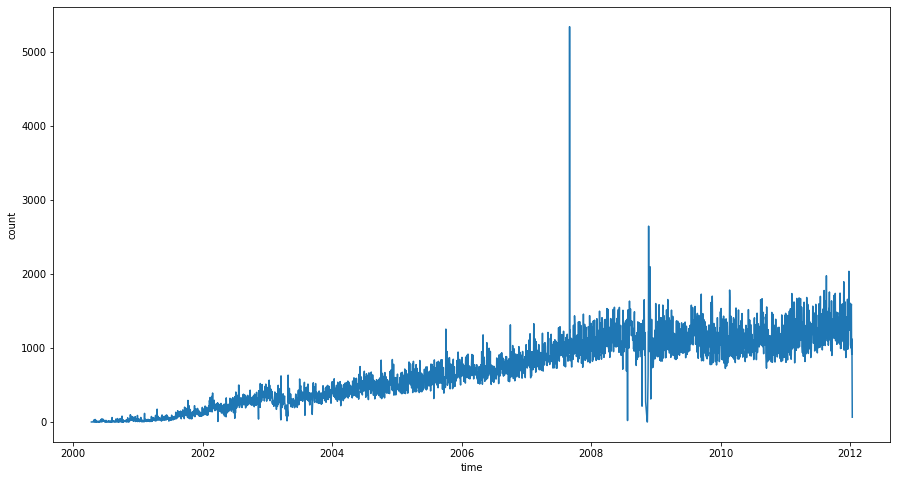

In [41]:
# ilość ocen w czasie
time = rb_pd["time"].groupby(rb_pd.time.dt.date).agg('count')
time = pd.DataFrame(time)
time = time.rename(columns={"time":"count"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=time, x='time', y='count')

In [42]:
# Jak się zmianiała popularność 10 najlepszych stylów w czasie?

Y_style = rb_pd[['total_score','beer_name', 'style', 'time']]
#Y_style['time'] = pd.DatetimeIndex(Y_style['time']).strftime('%Y-%m')
Y_style['time'] = pd.DatetimeIndex(Y_style['time']).year
Y_style = pd.DataFrame(Y_style.groupby(['time', 'style']).size()).reset_index()
Y_style = Y_style.rename(columns={0:'count_by_year'})
Y_style = Y_style.sort_values(['time', 'count_by_year'], ascending=False)

top_styles_a = popular_beer_styles.reset_index().drop(columns={'Liczba recenzji'})
Y_style = Y_style[Y_style['style'].isin(top_styles_a['style'].values.tolist())]
Y_style


/tmp/ipykernel_10305/2635277429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_style['time'] = pd.DatetimeIndex(Y_style['time']).year


,time,style,count_by_year
1058,2012,India Pale Ale (IPA),1095
1055,2012,Imperial Stout,771
1027,2012,Belgian Strong Ale,595
1056,2012,Imperial/Double IPA,517
1074,2012,Porter,485
...,...,...,...
11,2000,Belgian Strong Ale,114
14,2000,Bitter,101
9,2000,Barley Wine,78
37,2000,Imperial Stout,40


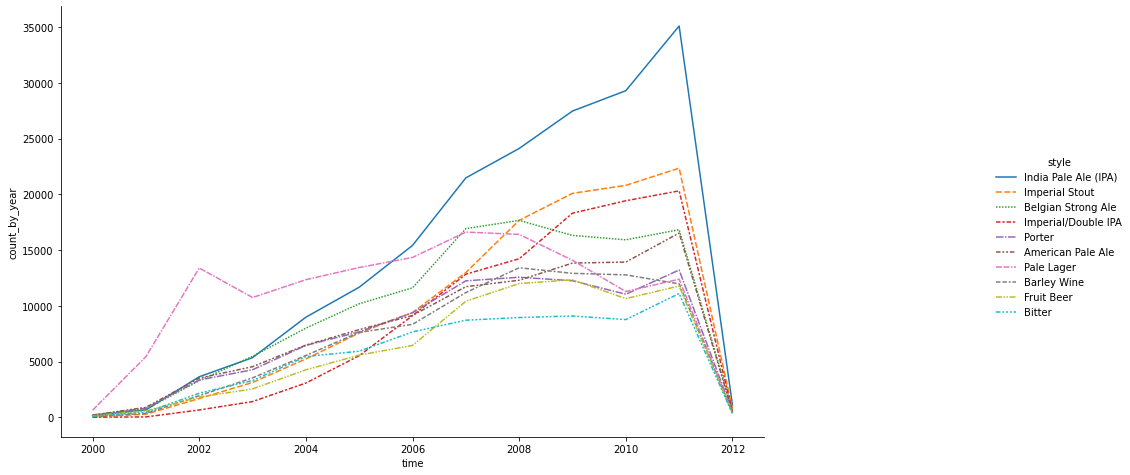

In [43]:

sns.relplot(x="time", y="count_by_year", hue="style", style="style", kind="line", data=Y_style)
plt.gcf().set_size_inches(18, 7)

In [44]:
# Zmiana popularności w czasie 10 najlepszych piw

Y_top_beer = rb_pd[['total_score','beer_name', 'style', 'time']]
Y_top_beer['time'] = pd.DatetimeIndex(Y_top_beer['time']).year
Y_top_beer = pd.DataFrame(Y_top_beer.groupby(['time', 'beer_name']).size()).reset_index()
Y_top_beer = Y_top_beer.rename(columns={0:'count_by_year'})
Y_top_beer = Y_top_beer.sort_values(['time', 'count_by_year'], ascending=False)
ten_best_beers = Top_beer_ratings.drop(columns={'review_count', 'total_score'}).iloc[0:10]

Y_top_beer = Y_top_beer[Y_top_beer['beer_name'].isin(ten_best_beers['beer_name'].values.tolist())]
Y_top_beer


/tmp/ipykernel_10305/2728096292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_top_beer['time'] = pd.DatetimeIndex(Y_top_beer['time']).year


,time,beer_name,count_by_year
320901,2012,Westvleteren 12,7
320408,2012,Three Floyds Dark Lord Russian Imperial Stout,6
314519,2012,Bells Expedition Stout,4
314516,2012,Bells Bourbon Barrel Double Cream/Expedition S...,3
314058,2012,AleSmith Speedway Stout,2
...,...,...,...
17247,2002,Three Floyds Dark Lord Russian Imperial Stout,23
6779,2001,Westvleteren 12,30
2387,2001,Bells Expedition Stout,17
1904,2000,Westvleteren 12,2


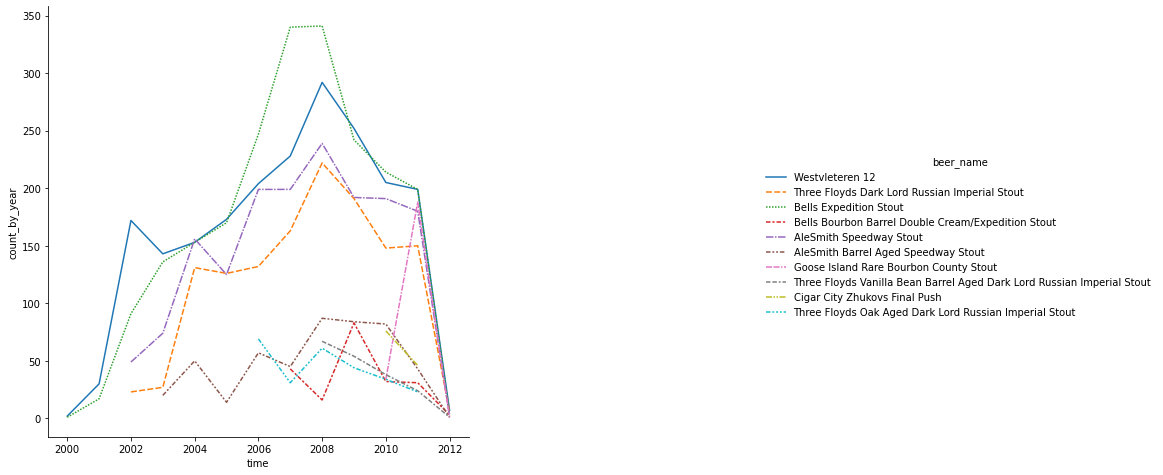

In [45]:
sns.relplot(x="time", y="count_by_year", hue="beer_name", style="beer_name", kind="line", data=Y_top_beer);
plt.gcf().set_size_inches(18, 7)

In [46]:
# zmiana oceny w czasie 10 najlepszych piw

Y_top_beer_score = rb_pd[['total_score','beer_name', 'style', 'time']]
Y_top_beer_score['time'] = pd.DatetimeIndex(Y_top_beer_score['time']).year
Y_top_beer_score = pd.DataFrame(Y_top_beer_score.groupby(['time', 'beer_name']).agg('mean')).reset_index()
ten_best_beers = Top_beer_ratings.drop(columns={'review_count', 'total_score'}).iloc[0:10]
Y_top_beer_score = Y_top_beer_score[Y_top_beer_score['beer_name'].isin(ten_best_beers['beer_name'].values.tolist())]
Y_top_beer_score

/tmp/ipykernel_10305/3847097873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_top_beer_score['time'] = pd.DatetimeIndex(Y_top_beer_score['time']).year


,time,beer_name,total_score
169,2000,Bells Expedition Stout,4.650000
1904,2000,Westvleteren 12,4.575000
2387,2001,Bells Expedition Stout,4.464706
6779,2001,Westvleteren 12,4.656667
7157,2002,AleSmith Speedway Stout,4.462245
...,...,...,...
314519,2012,Bells Expedition Stout,4.300000
316376,2012,Goose Island Rare Bourbon County Stout,4.800000
320408,2012,Three Floyds Dark Lord Russian Imperial Stout,4.241667
320430,2012,Three Floyds Vanilla Bean Barrel Aged Dark Lor...,4.450000


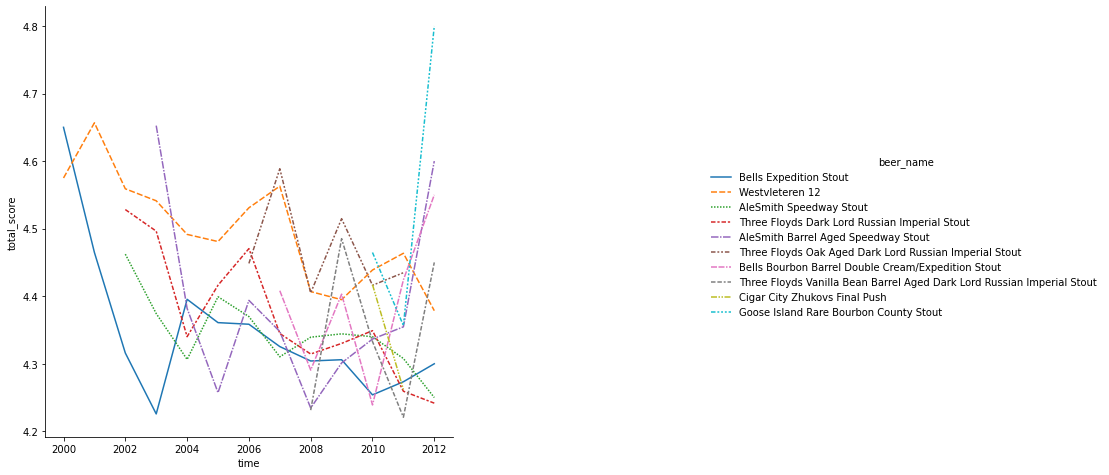

In [47]:

sns.relplot(x="time", y="total_score", hue="beer_name", style="beer_name", kind="line", data=Y_top_beer_score)
plt.gcf().set_size_inches(17, 7)

In [5]:
# 
top_users = rb_pd.reset_index().rename(columns={"index": 'userid'})

# top_users = rb_pd[['total_score','beer_name','beerid', 'userid']].groupby('userid').agg(['count','mean'])
# top_users = pd.DataFrame(top_users[(top_users['total_score','count']>200)])
# top_users = top_users.sort_values(by = ([('total_score','mean')]),ascending = False)
# top_users = top_users.drop(columns={('beerid', 'count'),('brewerid', 'count')})
# top_users.iloc[0:10]
top_users

,userid,reviewid,beer_name,beerid,brewerid,abv,style,appearance,aroma,palate,taste,overall,time,profilename,text,lang,total_score
0,95124,1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.6,0.6,0.65,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en,3.25
1,190266,2,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale (IPA),0.8,0.6,0.8,0.7,0.65,2006-09-03,TomDecapolis,On tap at the John Harvards in Springfield PA....,en,3.55
2,2051884,3,John Harvards Cristal Pilsner,71716,8481,4.8,Bohemian Pilsener,0.8,0.5,0.6,0.6,0.70,2000-05-19,PhillyBeer2112,"UPDATED FEB 19, 2003 Springfield, PA. I ve nev...",en,3.20
3,380484,4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,TomDecapolis,On tap the Springfield PA location billed as t...,en,2.00
4,475621,5,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",en,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899944,1616906,2899996,Grans UTE pils,101129,2493,4.7,Pale Lager,0.4,0.3,0.4,0.2,0.30,2009-04-29,Finn,"Can 0,5l. Pale golden colored. A small creamy ...",en,1.60
2899945,1711993,2899997,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.5,0.4,0.5,0.50,2009-04-23,KnutAlbert,Can from REMA 1000. Better than expected. Firm...,en,2.50
2899946,1807118,2899998,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.5,0.4,0.4,0.45,2009-04-18,larsga,Biggish white head. Light yellow body with lig...,en,2.35
2899947,1902292,2899999,Grans UTE pils,101129,2493,4.7,Pale Lager,0.6,0.3,0.6,0.4,0.35,2009-04-14,yngwie,"Can. A clear, slightly pale golden beer with a...",en,2.25
